In [13]:
import numpy as np
import math
from sklearn.cross_validation import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

In [30]:
def read_input(filename):
    input_data=[];
    f=open(filename);
    for line in f:
        input_data.append(line.split());
    return input_data;

def create_feature_matrix(input_data):
    x_list=[a[0:len(input_data[0])-1] for a in input_data];
    x=np.matrix(x_list);
    #x=np.transpose(x)
    return x.astype(np.float);

def create_y_matrix(input_data):
    y_list=[a[len(input_data[0])-1] for a in input_data];
    y=np.matrix(y_list);
    y=np.transpose(y)
    return y.astype(np.float);

def plot_graph(data_x, data_y, predicted_y, inp):
    plt.plot(data_x, data_y,'+');
    if(inp==False):
        plt.plot(data_x, predicted_y,'.');
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    plt.show();

In [31]:
def plot_input_data(filename):
    input_data=read_input(filename)
    data_x=create_feature_matrix(input_data)
    data_y=create_y_matrix(input_data)
    plot_graph( data_x, data_y,[], True);

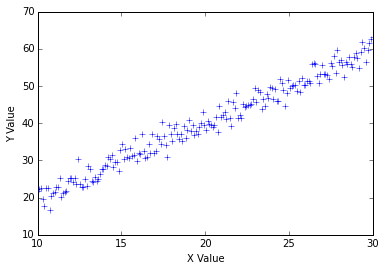

In [32]:
plot_input_data("svar-set1.dat")

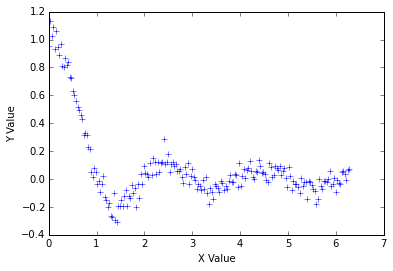

In [33]:
plot_input_data("svar-set2.dat")

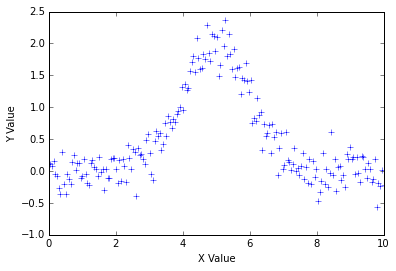

In [34]:
plot_input_data("svar-set3.dat")

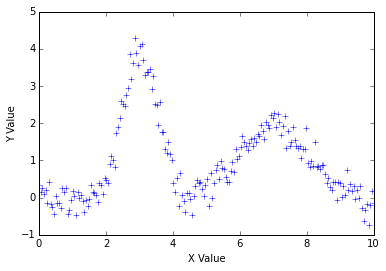

In [35]:
plot_input_data("svar-set4.dat")

In [98]:
def linear_model(training_data_x, training_data_y):
    B2=np.empty([training_data_x.shape[0], training_data_x.shape[1]]);
    A1=len(training_data_x);
    A2=training_data_x.sum();
    A3=np.square(training_data_x).sum();
    A=np.matrix([[A1, A2], [A2, A3]])
    B1=training_data_y.sum()
    for i in range(training_data_x.shape[0]):
        for j in range(training_data_y.shape[1]):
            B2[i][j]=np.matrix(training_data_x[i][j]*training_data_y[i][j])
    B2=B2.sum();
    B=np.matrix([[B1], [B2]])
    B=B.astype(np.float)
    theta=np.dot(np.linalg.inv(A), B);
    return theta;

def predict(testing_data_x, theta):
    z=np.ones((testing_data_x.shape[0],1));
    Z=np.concatenate((z,testing_data_x), axis=1);
    predicted_y=np.dot(Z, theta);
    return predicted_y;

def relative_mean_square(predicted_y, training_data_y):
    difference_y_num=np.empty([predicted_y.shape[0], predicted_y.shape[1]]);
    difference_y_deno=np.empty([predicted_y.shape[0], predicted_y.shape[1]]);
    difference_y=np.empty([predicted_y.shape[0], predicted_y.shape[1]]);
    for i in range(predicted_y.shape[0]):
        for j in range(predicted_y.shape[1]):
            difference_y_num[i][j]=predicted_y[i][j]-training_data_y[i][j];
            difference_y_num[i][j]=(difference_y_num[i][j]*difference_y_num[i][j])
            difference_y_deno[i][j]=training_data_y[i][j]-np.mean(training_data_y);
            difference_y_deno[i][j]=(difference_y_deno[i][j]*difference_y_deno[i][j])
            difference_y[i][j]=difference_y_num[i][j]/difference_y_deno[i][j]
    difference_y=difference_y.sum()
    RMS=(difference_y)/len(predicted_y);
    #RMS=(difference_y_num)/len(predicted_y);
    return RMS;
    
def do_cross_validation(data_x, data_y, n_folds=10):
    cv = KFold(len(data_y), n_folds, shuffle=True, random_state=6)
    error_mean_custom = []
    error_mean_python = []
    error_mean_train = []
    i=1;
    for train_idx, test_idx in cv:
        theta=linear_model(data_x[train_idx], data_y[train_idx]);
        #print theta
        predicted_y_train=predict(data_x[train_idx], theta)
        RMS_custom_train=relative_mean_square(predicted_y_train, data_y[train_idx]);
        print
        print "Training error For fold: %d RMS (relative mean sequare error) = %f" %(i, RMS_custom_train)
        error_mean_train.append(RMS_custom_train);
        print 
        #print "(Custom Model) For fold: %d theta = " %i
        #print theta
        clf=LinearRegression();
        clf.fit(data_x[train_idx], data_y[train_idx]);
        #print "(Python Model) For fold: %d theta =" %i
        #print clf.intercept_, clf.coef_
        predicted_y_python=clf.predict(data_x[test_idx]);
        predicted_y_custom=predict(data_x[test_idx], theta)
        RMS_custom=relative_mean_square(predicted_y_custom, data_y[test_idx]);
        RMS_python=relative_mean_square(predicted_y_python, data_y[test_idx]);
        #print mean_squared_error(data_y[test_idx], predicted_y_python)
        print "Testing error (Custom Model) For fold: %d RMS (relative mean sequare error = %f" %(i, RMS_custom)
        print "Testing error (Python Model) For fold: %d RMS (relative mean sequare error = %f" %(i, RMS_python)
        error_mean_custom.append(RMS_custom);
        error_mean_python.append(RMS_python);
        i=i+1;
    avg_custom=np.mean(error_mean_custom);
    avg_python=np.mean(error_mean_python);
    avg_train=np.mean(error_mean_train);
    return avg_custom, avg_python, avg_train;


In [99]:
def run_linear_regression_single(filename, fold):
    input_data=read_input(filename)
    data_x=create_feature_matrix(input_data)
    data_y=create_y_matrix(input_data)
    avg_custom, avg_python, avg_train=do_cross_validation(data_x, data_y, fold)
    print 
    print "Training Error Average RMS (relative mean square error): %f " %(avg_train)
    print 
    print "(Custom & Python Model) Testing Error Average RMS (relative mean square error): %f , %f" %(avg_custom, avg_python)
    theta=linear_model(data_x, data_y)
    predicted_y=predict(data_x, theta);
    plot_graph( data_x, data_y, predicted_y, False);

[[ 0.60080441]
 [ 1.97339196]]

Training error For fold: 1 RMS (relative mean sequare error) = 12.053212

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 0.039362
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 0.039362
[[ 0.26413667]
 [ 1.98341673]]

Training error For fold: 2 RMS (relative mean sequare error) = 4.666528

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 2.826595
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 2.826595
[[ 0.33627645]
 [ 1.98055195]]

Training error For fold: 3 RMS (relative mean sequare error) = 133.846481

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 0.268076
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 0.268076
[[ 0.29463143]
 [ 1.98017418]]

Training error For fold: 4 RMS (relative mean sequare error) = 69.323691

Testing error (Custom Model) For fold: 4 RMS (relative mean sequar

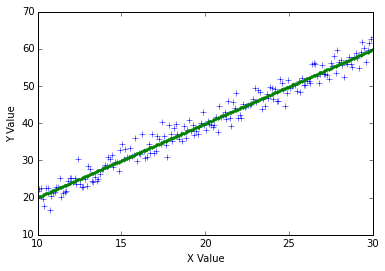

In [100]:
run_linear_regression_single("svar-set1.dat", 10)


[[ 0.35741263]
 [-0.08358394]]

Training error For fold: 1 RMS (relative mean sequare error) = 42.831512

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 30.677386
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 30.677386
[[ 0.32154219]
 [-0.0760185 ]]

Training error For fold: 2 RMS (relative mean sequare error) = 119.167792

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 2.607723
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 2.607723
[[ 0.3227382 ]
 [-0.07516692]]

Training error For fold: 3 RMS (relative mean sequare error) = 690.135561

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 3.409159
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 3.409159
[[ 0.3246952]
 [-0.0764625]]

Training error For fold: 4 RMS (relative mean sequare error) = 94.788433

Testing error (Custom Model) For fold: 4 RMS (relative mean sequ

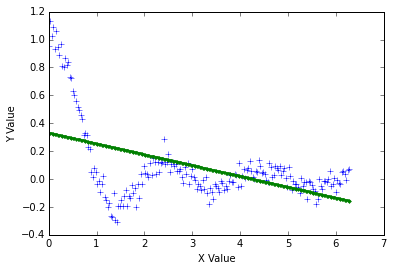

In [89]:
run_linear_regression_single("svar-set2.dat", 10)


[[ 0.50349846]
 [ 0.00102663]]

Training error For fold: 1 RMS (relative mean sequare error) = 0.997345

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 4.998881
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 4.998881
[[ 0.48587685]
 [-0.00443231]]

Training error For fold: 2 RMS (relative mean sequare error) = 1.003049

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 9.974183
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 9.974183
[[ 0.48765116]
 [ 0.00108569]]

Training error For fold: 3 RMS (relative mean sequare error) = 1.120350

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 1.158649
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 1.158649
[[ 0.50483456]
 [-0.00480453]]

Training error For fold: 4 RMS (relative mean sequare error) = 1.010962

Testing error (Custom Model) For fold: 4 RMS (relative mean sequare er

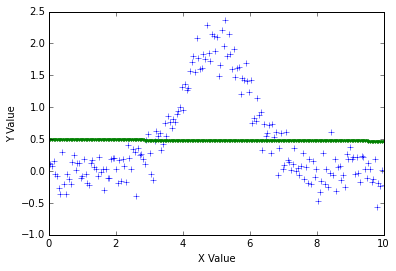

In [90]:
run_linear_regression_single("svar-set3.dat", 10)


[[ 0.91036128]
 [ 0.00839163]]

Training error For fold: 1 RMS (relative mean sequare error) = 1.062455

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 1.166566
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 1.166566
[[ 1.09462014]
 [-0.02083685]]

Training error For fold: 2 RMS (relative mean sequare error) = 35.538826

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 21.718434
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 21.718434
[[ 1.04935281]
 [-0.01221845]]

Training error For fold: 3 RMS (relative mean sequare error) = 1.753248

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 1.125286
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 1.125286
[[ 0.98756583]
 [-0.00207771]]

Training error For fold: 4 RMS (relative mean sequare error) = 1.009426

Testing error (Custom Model) For fold: 4 RMS (relative mean sequare

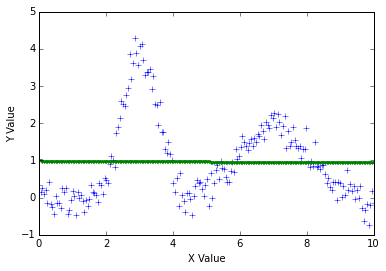

In [91]:
run_linear_regression_single("svar-set4.dat", 10)

For 2 folds: 
[[ 0.48923216]
 [ 1.97584148]]

Training error For fold: 1 RMS (relative mean sequare error) = 31.713013

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 1.048684
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 1.048684
[[ 0.08487077]
 [ 1.99448622]]

Training error For fold: 2 RMS (relative mean sequare error) = 1.083504

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 31.905037
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 31.905037

Training Error Average RMS (relative mean square error): 16.398258 

(Custom & Python Model) Testing Error Average RMS (relative mean square error): 16.476861 , 16.476861


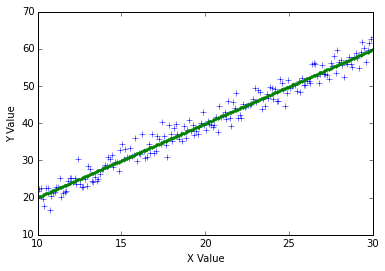

For 5 folds: 
[[ 0.04334264]
 [ 1.99991281]]

Training error For fold: 1 RMS (relative mean sequare error) = 9.743124

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 1.092428
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 1.092428
[[ 0.18045936]
 [ 1.9863908 ]]

Training error For fold: 2 RMS (relative mean sequare error) = 149.552509

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 14.443912
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 14.443912
[[ 0.77546668]
 [ 1.95911718]]

Training error For fold: 3 RMS (relative mean sequare error) = 3.165974

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 1.763217
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 1.763217
[[ 0.42285625]
 [ 1.9788777 ]]

Training error For fold: 4 RMS (relative mean sequare error) = 10.563362

Testing error (Custom Model) For fold: 4 RMS (relat

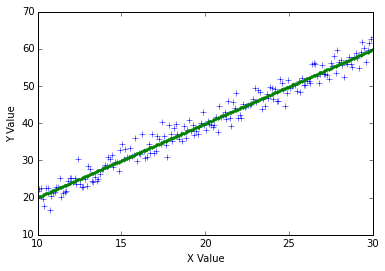

For 8 folds: 
[[ 0.27704208]
 [ 1.98860675]]

Training error For fold: 1 RMS (relative mean sequare error) = 15.772881

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 0.249995
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 0.249995
[[ 0.06116306]
 [ 1.99426747]]

Training error For fold: 2 RMS (relative mean sequare error) = 1063.906401

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 0.794363
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 0.794363
[[ 0.25166835]
 [ 1.98535827]]

Training error For fold: 3 RMS (relative mean sequare error) = 122.501692

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 2.780094
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 2.780094
[[ 0.59345544]
 [ 1.96989319]]

Training error For fold: 4 RMS (relative mean sequare error) = 1.470932

Testing error (Custom Model) For fold: 4 RMS (rela

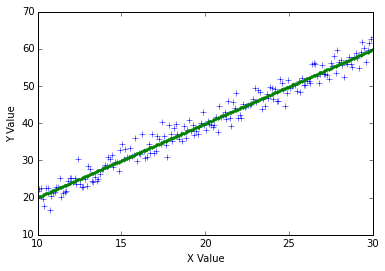

In [93]:
print "For 2 folds: "
run_linear_regression_single("svar-set1.dat", 2)
print "For 5 folds: "
run_linear_regression_single("svar-set1.dat", 5)
print "For 8 folds: "
run_linear_regression_single("svar-set1.dat", 8)

For 2 folds: 
[[ 0.28244874]
 [-0.06725263]]

Training error For fold: 1 RMS (relative mean sequare error) = 884.551543

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 3.657041
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 3.657041
[[ 0.38143687]
 [-0.0877183 ]]

Training error For fold: 2 RMS (relative mean sequare error) = 17.807320

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 1215.899647
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 1215.899647

Training Error Average RMS (relative mean square error): 451.179432 

(Custom & Python Model) Testing Error Average RMS (relative mean square error): 609.778344 , 609.778344


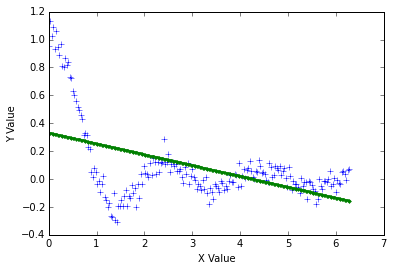

For 5 folds: 
[[ 0.34907301]
 [-0.08273247]]

Training error For fold: 1 RMS (relative mean sequare error) = 175.262566

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 26.261061
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 26.261061
[[ 0.31257497]
 [-0.07342269]]

Training error For fold: 2 RMS (relative mean sequare error) = 382.356950

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 4.755129
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 4.755129
[[ 0.33769212]
 [-0.07860549]]

Training error For fold: 3 RMS (relative mean sequare error) = 94.215383

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 4051.729223
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 4051.729223
[[ 0.32767767]
 [-0.07548589]]

Training error For fold: 4 RMS (relative mean sequare error) = 84.597849

Testing error (Custom Model) For fold: 4 R

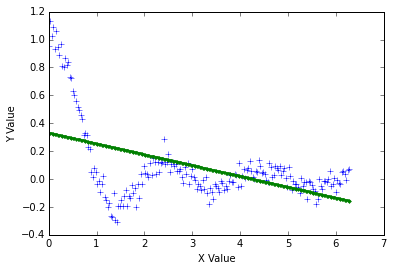

For 8 folds: 
[[ 0.35179026]
 [-0.08199281]]

Training error For fold: 1 RMS (relative mean sequare error) = 414.409330

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 487.494442
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 487.494442
[[ 0.31876754]
 [-0.07634663]]

Training error For fold: 2 RMS (relative mean sequare error) = 561.078547

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 130.855278
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 130.855278
[[ 0.31692933]
 [-0.07352448]]

Training error For fold: 3 RMS (relative mean sequare error) = 710.605256

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 1.017535
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 1.017535
[[ 0.31296886]
 [-0.07277968]]

Training error For fold: 4 RMS (relative mean sequare error) = 47.567389

Testing error (Custom Model) For fold: 4 

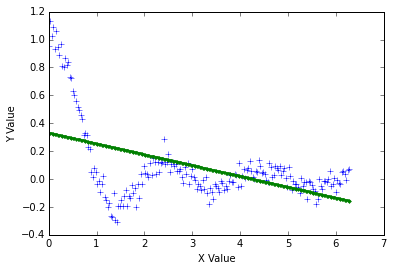

In [95]:
print "For 2 folds: "
run_linear_regression_single("svar-set2.dat", 2)
print "For 5 folds: "
run_linear_regression_single("svar-set2.dat", 5)
print "For 8 folds: "
run_linear_regression_single("svar-set2.dat", 8)

For 2 folds: 
[[ 0.42050345]
 [-0.00098366]]

Training error For fold: 1 RMS (relative mean sequare error) = 1.005239

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 1.767386
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 1.767386
[[  5.64227476e-01]
 [ -2.18696014e-04]]

Training error For fold: 2 RMS (relative mean sequare error) = 1.000685

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 10.303133
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 10.303133

Training Error Average RMS (relative mean square error): 1.002962 

(Custom & Python Model) Testing Error Average RMS (relative mean square error): 6.035260 , 6.035260


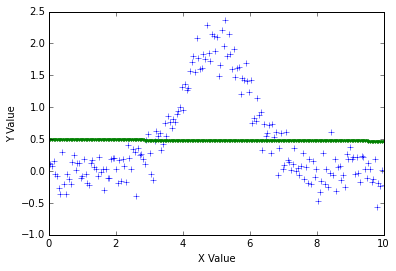

For 5 folds: 
[[ 0.48861911]
 [-0.00133391]]

Training error For fold: 1 RMS (relative mean sequare error) = 0.999048

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 0.956221
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 0.956221
[[ 0.4904659 ]
 [-0.00126331]]

Training error For fold: 2 RMS (relative mean sequare error) = 1.000281

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 0.970149
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 0.970149
[[  4.67462055e-01]
 [ -3.94065390e-04]]

Training error For fold: 3 RMS (relative mean sequare error) = 0.997245

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 21.576843
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 21.576843
[[ 0.47691592]
 [ 0.00289276]]

Training error For fold: 4 RMS (relative mean sequare error) = 1.099208

Testing error (Custom Model) For fold: 4 RMS

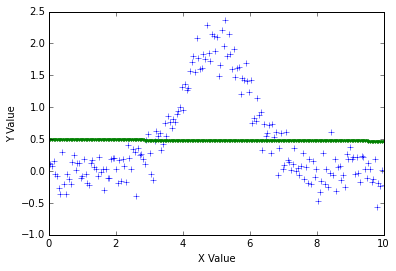

For 8 folds: 
[[  5.21351777e-01]
 [  4.25175320e-04]]

Training error For fold: 1 RMS (relative mean sequare error) = 0.998010

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 5.015660
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 5.015660
[[ 0.44289803]
 [ 0.00128292]]

Training error For fold: 2 RMS (relative mean sequare error) = 1.000100

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 235.271852
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 235.271852
[[ 0.516837 ]
 [-0.0047834]]

Training error For fold: 3 RMS (relative mean sequare error) = 30.654488

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 1.080351
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 1.080351
[[ 0.47844211]
 [-0.00570624]]

Training error For fold: 4 RMS (relative mean sequare error) = 1.005406

Testing error (Custom Model) For fold: 4 RM

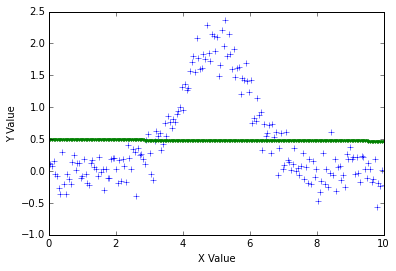

In [96]:
print "For 2 folds: "
run_linear_regression_single("svar-set3.dat", 2)
print "For 5 folds: "
run_linear_regression_single("svar-set3.dat", 5)
print "For 8 folds: "
run_linear_regression_single("svar-set3.dat", 8)

For 2 folds: 
[[ 1.1713556 ]
 [-0.02678598]]

Training error For fold: 1 RMS (relative mean sequare error) = 49.136712

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 74.456820
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 74.456820
[[ 0.81806677]
 [ 0.0174926 ]]

Training error For fold: 2 RMS (relative mean sequare error) = 5.970745

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 1055.140933
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 1055.140933

Training Error Average RMS (relative mean square error): 27.553728 

(Custom & Python Model) Testing Error Average RMS (relative mean square error): 564.798877 , 564.798877


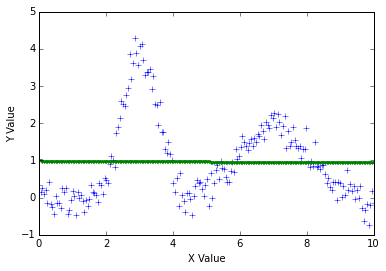

For 5 folds: 
[[ 1.00326351]
 [-0.00664235]]

Training error For fold: 1 RMS (relative mean sequare error) = 1.028861

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 0.982042
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 0.982042
[[ 1.04589216]
 [-0.00965593]]

Training error For fold: 2 RMS (relative mean sequare error) = 0.995492

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 1.325973
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 1.325973
[[ 1.0467917 ]
 [-0.00583002]]

Training error For fold: 3 RMS (relative mean sequare error) = 1.013799

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 3.635518
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 3.635518
[[  9.43312822e-01]
 [ -6.87027319e-04]]

Training error For fold: 4 RMS (relative mean sequare error) = 1.000306

Testing error (Custom Model) For fold: 4 RMS (

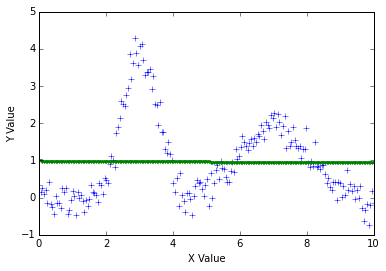

For 8 folds: 
[[ 0.93316964]
 [ 0.00431979]]

Training error For fold: 1 RMS (relative mean sequare error) = 1.011805

Testing error (Custom Model) For fold: 1 RMS (relative mean sequare error = 0.983278
Testing error (Python Model) For fold: 1 RMS (relative mean sequare error = 0.983278
[[ 1.09307559]
 [-0.02426816]]

Training error For fold: 2 RMS (relative mean sequare error) = 1.300184

Testing error (Custom Model) For fold: 2 RMS (relative mean sequare error = 1.023559
Testing error (Python Model) For fold: 2 RMS (relative mean sequare error = 1.023559
[[ 1.09681656]
 [-0.00822221]]

Training error For fold: 3 RMS (relative mean sequare error) = 5.395095

Testing error (Custom Model) For fold: 3 RMS (relative mean sequare error = 373.837893
Testing error (Python Model) For fold: 3 RMS (relative mean sequare error = 373.837893
[[ 0.97246129]
 [-0.0062968 ]]

Training error For fold: 4 RMS (relative mean sequare error) = 100.617091

Testing error (Custom Model) For fold: 4 RMS (rela

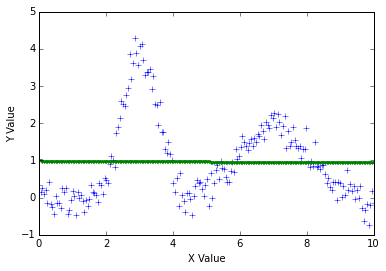

In [97]:
print "For 2 folds: "
run_linear_regression_single("svar-set4.dat", 2)
print "For 5 folds: "
run_linear_regression_single("svar-set4.dat", 5)
print "For 8 folds: "
run_linear_regression_single("svar-set4.dat", 8)